<a href="https://colab.research.google.com/github/TomMcIver/Q-Paper/blob/main/q_blueprint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip uninstall -y qiskit qiskit-aer qiskit-terra qiskit-ibmq-provider
!pip install qiskit qiskit-aer --upgrade
!pip install PennyLane-Lightning


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 41.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 58.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 810.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 70.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 100.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.0/930.0 kB 48.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_bloch_multivector, plot_histogram
import pennylane as qml

plt.rcParams["figure.figsize"] = (8, 6)


In [4]:
import numpy as np

class Qubit:
    def __init__(self):

        self.state = np.array([1, 0], dtype=complex)

    def apply_hadamard(self):
        #apply Hadamard gate
        H = np.array([[1, 1], [1, -1]]) / np.sqrt(2)
        self.state = H @ self.state

    def measure(self):
        # measure the qubit returns 0 or 1 with a rough 50% probability
        return np.random.choice([0, 1], p=np.abs(self.state)**2)


qubit = Qubit()

print("Before Hadamard:", qubit.state)


qubit.apply_hadamard()

print("After Hadamard:", qubit.state)


results = [qubit.measure() for _ in range(10)]
print("Measurement results:", results)


Before Hadamard: [1.+0.j 0.+0.j]
After Hadamard: [0.70710678+0.j 0.70710678+0.j]
Measurement results: [0, 1, 1, 1, 1, 0, 0, 0, 0, 0]


### This code shows the initialization of a Qubit of |0⟩ and |1⟩ in superposition using the Hadamrd gate.  And how the probablityes work when measured.

In [5]:
import numpy as np

class QuantumRegister:
    def __init__(self):

        self.state = np.array([1, 0, 0, 0], dtype=complex)

    def apply_hadamard(self, qubit):
         #hadamard gate to one qubit.
        H = np.array([[1, 1], [1, -1]]) / np.sqrt(2)
        gate = np.kron(H, np.eye(2)) if qubit == 0 else np.kron(np.eye(2), H)
        self.state = gate @ self.state

    def apply_cnot(self):
        """ Apply CNOT gate to entangle qubits. """
        CNOT = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0]])
        self.state = CNOT @ self.state

    def measure(self):
        """ Measure the qubits and return 00, 01, 10, or 11. """
        return np.random.choice([0, 1, 2, 3], p=np.abs(self.state)**2)

# apply hadamard & cnot aka: entanglement
register = QuantumRegister()
register.apply_hadamard(0)
register.apply_cnot()

# bell state
bell_state = register.state
print(f"Bell State: ({bell_state[0]:.2f})|00⟩ + ({bell_state[3]:.2f})|11⟩")

# measure
results = [f"{register.measure():02b}" for _ in range(10)]
print("Measurement outcomes:", ", ".join(results))


Bell State: (0.71+0.00j)|00⟩ + (0.71+0.00j)|11⟩
Measurement outcomes: 11, 11, 11, 11, 00, 11, 00, 00, 00, 11


### This creates a register of a quantum system that uses two qubits puts one in a superposition and then entangles it with another (more specifically a bell state this is mainly sued for 2 qubits). From there we get the bell state and then measure the system collapsing the qubits into there different states.

In [6]:
import pennylane as qml
import numpy as np

#2 qubits
dev = qml.device("lightning.qubit", wires=2)

# variational quantum circuit
@qml.qnode(dev)
def variational_circuit(params, x):

    qml.RX(x, wires=0)

    # apply parameterized rotations on both qubits
    qml.RY(params[0], wires=0)
    qml.RY(params[1], wires=1)

    # entanglement with a CNOT gate
    qml.CNOT(wires=[0, 1])

    # parameterized rotation on qubit 0
    qml.RZ(params[2], wires=0)

    # mesure expectation values of pauli-z on qubits
    return qml.expval(qml.PauliZ(0)), qml.expval(qml.PauliZ(1))

# compares circuit output to a target output
def cost(params, x, target):
    predictions = variational_circuit(params, x)


    return np.sum((np.array(predictions) - np.array(target)) ** 2)

# initialize parameters randomly with pi
np.random.seed(42)
init_params = np.random.uniform(low=-np.pi, high=np.pi, size=3)

x_input = np.pi / 4
target_output = [0.5, -0.5]

#  optimizer is gradient descent
opt = qml.GradientDescentOptimizer(stepsize=0.1)
steps = 50
params = init_params

# loop to minimize the cost function
for i in range(steps):
    params = opt.step(lambda p: cost(p, x_input, target_output), params)
    if i % 10 == 0:
        current_cost = cost(params, x_input, target_output)
        print(f"Step {i}: Cost = {current_cost:.4f}")

print("Optimized Parameters:", params)
print("Final Circuit Output:", variational_circuit(params, x_input))


/usr/local/lib/python3.11/dist-packages/pennylane/_grad.py:216: UserWarning: Attempted to differentiate a function with no trainable parameters. If this is unintended, please add trainable parameters via the 'requires_grad' attribute or 'argnum' keyword.
  warnings.warn(


Step 0: Cost = 0.0006
Step 10: Cost = 0.0006
Step 20: Cost = 0.0006
Step 30: Cost = 0.0006
Step 40: Cost = 0.0006
Optimized Parameters: [-0.78828768  2.83192151  1.45766093]
Final Circuit Output: (0.4985531554319675, -0.47483889537316776)


This demonstrates a simple parameterized quantum circuit with parameters 0 and 1. These parameters are entangled using a CNOT gate. Gradient descent is then applied as the optimizer to determine the correct parameters.

Classical search time for 64 items: 0.092268 milliseconds
Quantum search simulation time: 88.562965 milliseconds
Theoretical Quantum search time: 0.011533 milliseconds
Percentage difference between Theoretical and Classical time: 87.50%


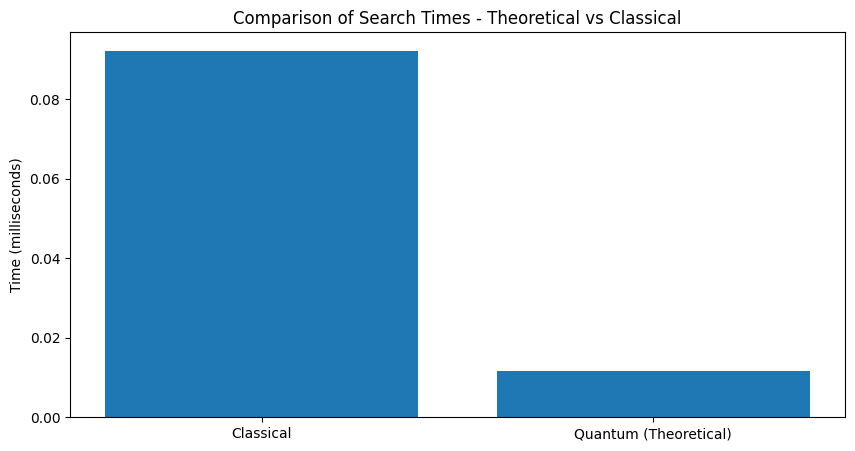

Classical found item 10 at index 10
Quantum found item at state |001010⟩ with probability 0.015625


In [7]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt
import time

n_qubits = 6
n_items = 2 ** n_qubits

dev = qml.device("lightning.qubit", wires=n_qubits)

# grover algo with adjustable iterations
@qml.qnode(dev)
def grover_search(oracle, iterations):
    # put q in  superposition
    for wire in range(n_qubits):
        qml.Hadamard(wires=wire)

    #  grover iterations
    for _ in range(iterations):
        oracle()

        for wire in range(n_qubits):
            qml.Hadamard(wires=wire)
            qml.PauliX(wires=wire)
        qml.MultiRZ(np.pi, wires=range(n_qubits))
        for wire in range(n_qubits):
            qml.PauliX(wires=wire)
            qml.Hadamard(wires=wire)

    return qml.probs(wires=range(n_qubits))

def quantum_oracle():
    for i in range(n_qubits):
        if (10 >> i) & 1:
            qml.PauliX(i)
    # phase flip on
    qml.MultiRZ(np.pi, wires=range(n_qubits))
    # undo the bit flips
    for i in range(n_qubits):
        if (10 >> i) & 1:
            qml.PauliX(i)

# classical linear search
def classical_search(items, target):
    for i, item in enumerate(items):
        if item == target:
            return i
    return -1

# setup
quantum_items = list(range(n_items))
classical_items = list(range(n_items))
target_item = 10


start_time = time.time()
result_classical = classical_search(classical_items, target_item)
classical_time = time.time() - start_time


fixed_iterations = 10

# q search simulation
start_time = time.time()
quantum_result = grover_search(quantum_oracle, iterations=fixed_iterations)
quantum_simulation_time = time.time() - start_time

# theoretical Qquantum Time (√N speedup)
theoretical_quantum_time = classical_time / np.sqrt(n_items)

#  times to milliseconds
classical_time_ms = classical_time * 1000
theoretical_quantum_time_ms = theoretical_quantum_time * 1000

print(f"Classical search time for {n_items} items: {classical_time_ms:.6f} milliseconds")
print(f"Quantum search simulation time: {quantum_simulation_time * 1000:.6f} milliseconds")
print(f"Theoretical Quantum search time: {theoretical_quantum_time_ms:.6f} milliseconds")

# cal %
dif = abs(classical_time - theoretical_quantum_time)
percent_diff = (dif / classical_time) * 100 if classical_time != 0 else 0

print(f"Percentage difference between Theoretical and Classical time: {percent_diff:.2f}%")


labels = ['Classical', 'Quantum (Theoretical)']
times = [classical_time_ms, theoretical_quantum_time_ms]

plt.figure(figsize=(10, 5))
plt.bar(labels, times)
plt.title('Comparison of Search Times - Theoretical vs Classical')
plt.ylabel('Time (milliseconds)')
plt.show()

print(f"Classical found item {target_item} at index {result_classical}")
print(f"Quantum found item at state |{bin(target_item)[2:].zfill(n_qubits)}⟩ with probability {quantum_result[target_item]:.6f}")

The quantum search algorithm works by first putting everything into a superposition. Then, we mark the target we want by flipping its phase, making it stand out. We repeat this process a few times to amplify the target's probability, ensuring we find it with high accuracy.